In [2]:
from Dataset1_2a import plot_graph_a, plot_graph_b, scalar_encoding

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("network_backup_dataset.csv")
days = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
work_flows = {'work_flow_0':0,'work_flow_1':1,'work_flow_2':2,'work_flow_3':3,'work_flow_4':4}

strip_data = data[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', \
'Work-Flow-ID', 'File Name','Size of Backup (GB)']].values
print strip_data

[[1 'Monday' 1 'work_flow_0' 'File_0' 0.0]
 [1 'Monday' 1 'work_flow_2' 'File_12' 0.0]
 [1 'Monday' 1 'work_flow_2' 'File_13' 0.0]
 ...
 [15 'Sunday' 21 'work_flow_4' 'File_26' 0.19857243645989475]
 [15 'Sunday' 21 'work_flow_4' 'File_25' 0.1995700723304316]
 [15 'Sunday' 21 'work_flow_4' 'File_24' 0.2012005192156364]]


In [4]:
scal_data = np.array(scalar_encoding(strip_data))
One_HOT = np.array([])

for i in range(0,5):
    enc = LabelBinarizer()
    scal_data1 = enc.fit_transform(scal_data[:,i])
    if One_HOT.size == 0:
        One_HOT = scal_data1
    else:
        One_HOT = np.concatenate((One_HOT, scal_data1), axis = 1)
One_HOT = np.concatenate((One_HOT, strip_data[:,-1].reshape(-1,1)), axis = 1)
        
        

In [5]:
print One_HOT[:,-1]

[0.0 0.0 0.0 ... 0.19857243645989475 0.1995700723304316 0.2012005192156364]


In [6]:
hidden_layer_sizes = [2, 5, 10, 50, 100, 150, 200, 250,\
    300, 350, 400, 450, 500, 550, 600]

parameters = {'alpha' : [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]}
activation = ["logistic", "relu", "tanh"]

In [ ]:
l1 = []
l2 = []
l3 = []

for act in activation:
    print act
    for hid in hidden_layer_sizes:
            
        gs = GridSearchCV(MLPRegressor(activation = act, hidden_layer_sizes = (hid,)), \
            parameters, cv = 10, scoring = "neg_mean_squared_error")
            
        gs.fit(One_HOT[:,:-1], One_HOT[:,-1])
        score = gs.best_score_
        print sqrt(-1*score)
        if act == "logistic":
            l1.append(sqrt(-1*score))
        elif act == "relu":
            l2.append(sqrt(-1*score))
        elif act == "tanh":
            l3.append(sqrt(-1*score))
    print

logistic
0.0894300194384
0.0888720827089
0.088694102326
0.0889060245438
0.0889203166119
0.0892565863833
0.0892518004423
0.0900876573599
0.0895747103951
0.0905228743558
0.0899795086223
0.0908582765828
0.0905743640022
0.0903827703204
0.0908269736976

relu
0.0989137754891
0.0751621252671
0.0542001562407
0.0273337490357
0.0258156183544
0.0219076180503
0.0189152476892
0.0220289514002
0.019027407732
0.0220323790531
0.017750141794
0.021128941766
0.0199193375832
0.0170160220313
0.0176555770969

tanh
0.0995113182321
0.0948748574412
0.0784850107612
0.0586336027662
0.0492214363353
0.0425701794994
0.0422740215029
0.0433820853861
0.0447746639727
0.0411357968458
0.0388787969033
0.0408162907329
0.0456538579766
0.0439944161851
0.0450152647661



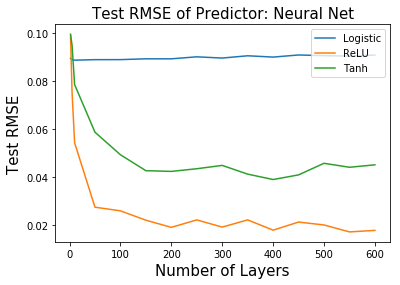

In [7]:
log_test_err = [0.0894300194384,0.0888720827089,0.088694102326,0.0889060245438,0.0889203166119,0.0892565863833,0.0892518004423,\
                0.0900876573599, 0.0895747103951,0.0905228743558,0.0899795086223,0.0908582765828,0.0905743640022,0.0903827703204,\
                0.0908269736976]

relu_test_err = [0.0989137754891,0.0751621252671,0.0542001562407,0.0273337490357,0.0258156183544,0.0219076180503,\
                 0.0189152476892,0.0220289514002,0.019027407732, 0.0220323790531,0.017750141794,0.021128941766,\
                 0.0199193375832,0.0170160220313,0.0176555770969]

tanh_test_err = [0.0995113182321,0.0948748574412,0.0784850107612,0.0586336027662,0.0492214363353,0.0425701794994,0.0422740215029,\
                 0.0433820853861,0.0447746639727,0.0411357968458,0.0388787969033,0.0408162907329,0.0456538579766,0.0439944161851,0.0450152647661]

plt.plot(hidden_layer_sizes, log_test_err, label = "Logistic")
plt.plot(hidden_layer_sizes, relu_test_err, label = "ReLU")
plt.plot(hidden_layer_sizes, tanh_test_err, label = "Tanh")

plt.xlabel('Number of Layers', size=15)
plt.ylabel('Test RMSE', size=15)
plt.title('Test RMSE of Predictor: ' + 'Neural Net', size=15)
plt.legend(fontsize=10, loc = 'upper right')
plt.draw()
plt.savefig('D1_nn_c.png', bbox_inches='tight')
plt.show()

# Best results: ReLU with 200 hidden nodes

In [26]:
parameters1 = {'alpha' : [0.01]}

gs = GridSearchCV(MLPRegressor(activation = "relu", hidden_layer_sizes = (200,)), \
            parameters1, cv = 10, scoring = "neg_mean_squared_error", return_train_score = True)
gs.fit(One_HOT[:,:-1], One_HOT[:,-1])
print sqrt(-gs.best_score_)

0.0212543538377


In [27]:
print sqrt(-gs.best_score_)
print gs.cv_results_
print gs.best_estimator_

0.0212543538377
{'rank_test_score': array([1], dtype=int32), 'split6_test_score': array([-0.00035763]), 'split7_train_score': array([-0.00019258]), 'split0_train_score': array([-0.00018363]), 'split2_test_score': array([-0.00023925]), 'mean_fit_time': array([2.07877922]), 'split3_train_score': array([-0.0001813]), 'split6_train_score': array([-0.00020667]), 'split9_test_score': array([-0.00034283]), 'std_test_score': array([0.00033577]), 'params': [{'alpha': 0.01}], 'std_fit_time': array([0.0427909]), 'std_score_time': array([0.00035649]), 'split8_test_score': array([-0.00042109]), 'std_train_score': array([1.63420361e-05]), 'split4_test_score': array([-0.00021129]), 'split1_train_score': array([-0.0001973]), 'split2_train_score': array([-0.00020046]), 'split4_train_score': array([-0.0001872]), 'mean_score_time': array([0.00794077]), 'split9_train_score': array([-0.00019224]), 'split5_test_score': array([-0.00061851]), 'mean_train_score': array([-0.00019881]), 'split8_train_score': arr

In [29]:
train_Err = [-0.00019258, -0.00018363, -0.0001813, -0.00020667, 1.63420361e-05, \
             -0.0001872,-0.00019224, -0.00020537, -0.00020046,-0.00024132]
print sqrt(-sum(train_Err) / 10.0)

0.0133207656083


[0.0 0.0 0.0 ... 0.19857243645989475 0.1995700723304316 0.2012005192156364]


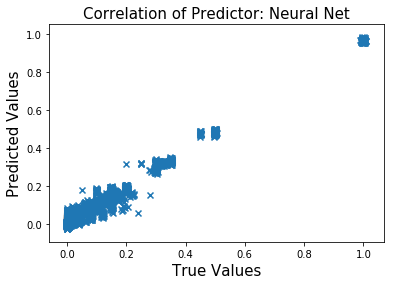

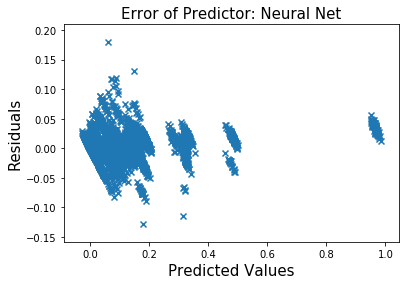

In [10]:
y_out = gs.predict(One_HOT[:,:-1])

plot_graph_a(One_HOT[:,-1], y_out, "Neural Net")
plot_graph_b(y_out, (One_HOT[:,-1] - y_out), "Neural Net")

In [17]:
# train_scores, valid_scores = validation_curve(
#     MLPRegressor(activation = "relu", hidden_layer_sizes = (200,), alpha = 0.01), One_HOT[:,:-1], One_HOT[:,-1],\
#              cv = 10, scoring = "neg_mean_squared_error")
